# EQUITY COMPOUND OPTIONS - VALUATION AND RISK ANALYSIS

Valuation and Risk of Equity Basket Options in which the option is on a basket of stocks.

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
from financepy.finutils import FinDate
from financepy.market.curves.FinDiscountCurveFlat import *
from financepy.products.equity.FinEquityCompoundOption import *
from financepy.products.equity.FinEquityModelTypes import FinEquityModelBlackScholes

# Compound Option

All the assets in the basket have the same characteristicsm

In [24]:
expiryDate1 = FinDate(1, 1, 2011)
expiryDate2 = FinDate(1, 1, 2012)

In [25]:
strikePrice1 = 5.0
strikePrice2 = 95.0

In [26]:
optionType1 = FinOptionTypes.EUROPEAN_PUT
optionType2 = FinOptionTypes.AMERICAN_CALL

In [27]:
cmpdOption = FinEquityCompoundOption(expiryDate1, expiryDate2,
                                     strikePrice1, strikePrice2,
                                     optionType1, optionType2)

In [28]:
print(cmpdOption)

EXPIRY DATE 1: SAT 1 JAN 2011
STRIKE PRICE 1: 5.0
OPTION TYPE 1: FinOptionTypes.EUROPEAN_PUT
EXPIRY DATE 2: SUN 1 JAN 2012
STRIKE PRICE 2: 95.0
OPTION TYPE 2: FinOptionTypes.AMERICAN_CALL


## Valuation

In [29]:
valueDate = FinDate(1, 1, 2009)

In [30]:
interestRate = 0.035

In [31]:
discountCurve = FinDiscountCurveFlat(valueDate, interestRate)

In [32]:
volatility = 0.15

In [33]:
model = FinEquityModelBlackScholes(volatility)

In [34]:
stockPrice = 85.0
dividendYield = 0.0

In [35]:
cmpdOption.value(valueDate, stockPrice, discountCurve, dividendYield, model, 1000)

1.7712848391683136

If the option has any American characteristics then the tree is used which gives value, delta, gamma and theta.

In [36]:
numTimeSteps= 500
cmpdOption.value(valueDate, stockPrice, discountCurve, dividendYield, model, numTimeSteps)

1.774466971163126

## Convergence Analysis

In [37]:
numSteps = np.linspace(2000,10000,10)

In [38]:
values = []
for n in numSteps:
    v = cmpdOption.value(valueDate, stockPrice, discountCurve, dividendYield, model, int(n))
    values.append(v)

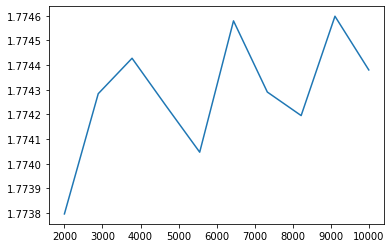

In [39]:
plt.plot(numSteps, values);

If the option is all European then we get a flat line. If not, we use the binomial tree and get the price to 4 significant figures with 2000 steps.

## Risk Sensitivities

The analytical model produced the following sensitivities

In [40]:
cmpdOption.delta(valueDate, stockPrice, discountCurve, dividendYield, model)

-0.0879838645273523

In [41]:
cmpdOption.gamma(valueDate, stockPrice, discountCurve, dividendYield, model)

-1.3322676295501878e-07

In [42]:
cmpdOption.theta(valueDate, stockPrice, discountCurve, dividendYield, model)

0.40877417585423337

In [43]:
cmpdOption.vega(valueDate, stockPrice, discountCurve, dividendYield, model)

-3.6482445951491194

In [44]:
cmpdOption.rho(valueDate, stockPrice, discountCurve, dividendYield, model)

-27.188070759855965

These are very accurate for the non-tree measures but less so for the tree. 

Copyright (c) 2020 Dominic O'Kane